In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyasi2002/vgg16-models-mnist-fashion-mnist")

print("Path to dataset files:", path)


100%|██████████| 210M/210M [00:05<00:00, 38.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shreyasi2002/vgg16-models-mnist-fashion-mnist/versions/2


In [61]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
from sklearn.metrics import accuracy_score
import torchmetrics
from torch.nn.functional import softmax

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
csv_01 = pd.read_csv("/content/sample_data/mnist_train_small.csv")
csv_02 = pd.read_csv("/content/sample_data/mnist_test.csv")
x_test = pd.DataFrame(csv_02)
x_train = x_test.sample(frac=1)
y_test = x_test["7"]
x_test.drop("7", axis= 1, inplace=True)
x_train = pd.DataFrame(csv_01)
x_train = x_train.sample(frac=1)
y_train = x_train["6"]
x_train.drop("6", axis=1, inplace=True)
x_train = torch.tensor(x_train.values, dtype=torch.float32)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.int64)
y_test = torch.tensor(y_test.values, dtype=torch.int64)

In [10]:
class Mnist(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(784, 512)
    self.layer_2 = nn.Linear(512, 256)
    self.layer_3 = nn.Linear(256, 128)
    self.layer_4 = nn.Linear(128, 64)
    self.layer_5 = nn.Linear(64, 32)
    self.layer_6 = nn.Linear(32, 16)
    self.layer_7 = nn.Linear(16, 10)
    self.relu = nn.LeakyReLU()
  def forward(self, x):
    z1 = self.layer_1(x)
    a1 = self.relu(z1)
    z2 = self.layer_2(a1)
    a2 = self.relu(z2)
    z3 = self.layer_3(a2)
    a3 = self.relu(z3)
    z4 = self.layer_4(a3)
    a4 = self.relu(z4)
    z5 = self.layer_5(a4)
    a5 = self.relu(z5)
    z6 = self.layer_6(a5)
    a6 = self.relu(z6)
    z7 = self.layer_7(a6)
    return z7

In [11]:
model = Mnist()
optimizer = SGD(model.parameters(), lr = 1e-2, weight_decay=1e-4, momentum=0.9)
loss_function = CrossEntropyLoss()

In [66]:
list_of_losses_test = []
list_of_losses_train = []
acc = torchmetrics.Accuracy(task="multiclass", num_classes= 10)
for i in range (100):
  model.train()
  y_pred_train = model(x_train)
  train_loss = loss_function(y_pred_train, y_train)
  list_of_losses_train.append(train_loss)#.detach().numpy())
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    y_pred_test = model(x_test)
    test_loss = loss_function(y_pred_test, y_test)
    list_of_losses_test.append(test_loss)
    if i % 10 == 0:
      print(f"test loss: {test_loss} \t train loss: {train_loss}")
      print(f"test accuracy:{acc(torch.tensor([torch.argmax(i) for i in softmax(y_pred_test, dim=1)]), y_test)}")
      print(f"train accuracy:{acc(torch.tensor([torch.argmax(i) for i in softmax(y_pred_train, dim=1)]), y_train)}")

test loss: 0.1887819468975067 	 train loss: 0.024908442050218582
test accuracy:0.9551955461502075
train accuracy:0.9959498047828674
test loss: 0.19163627922534943 	 train loss: 0.02211252599954605
test accuracy:0.9551955461502075
train accuracy:0.9965498447418213
test loss: 0.19407515227794647 	 train loss: 0.019688168540596962
test accuracy:0.9556955695152283
train accuracy:0.9968998432159424
test loss: 0.19712688028812408 	 train loss: 0.017658118158578873
test accuracy:0.9556955695152283
train accuracy:0.9973998665809631
test loss: 0.19943363964557648 	 train loss: 0.01586061902344227
test accuracy:0.9562956094741821
train accuracy:0.9975498914718628
test loss: 0.2019934356212616 	 train loss: 0.014063704758882523
test accuracy:0.9565956592559814
train accuracy:0.9976499080657959
test loss: 0.20529696345329285 	 train loss: 0.012467075139284134
test accuracy:0.9566956758499146
train accuracy:0.9978498816490173
test loss: 0.2079332172870636 	 train loss: 0.011199697852134705
test acc

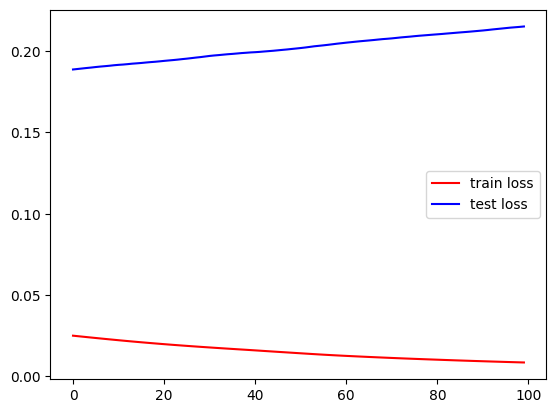

In [67]:
list_of_losses_train = [i.detach() for i in list_of_losses_train]
list_of_losses_test = [i.detach() for i in list_of_losses_test]
import matplotlib.pyplot as plt
plt.plot(range(100), list_of_losses_train, label="train loss", color = "r")
plt.plot(range(100), list_of_losses_test, label="test loss", color = "b")
plt.legend()
plt.show()

In [68]:
y_preds = []
with torch.inference_mode():
  for i in softmax(model(x_test), dim=1):
    y_preds.append(torch.argmax(i).numpy())
accuracy_score(y_preds, y_test)


0.9566956695669567

array(9)

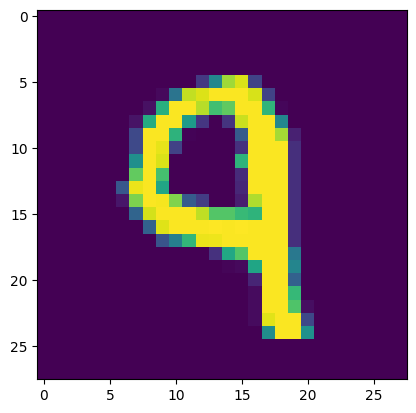

In [69]:
x = 335
plt.imshow(x_test[x].reshape(28, 28))
y_preds[x]